# Overview

In this notebook, we'll explore a typical workflow for applying data science to a problem and creating a predictive model.

Though the process of applying data science to problems can vary somewhat from one problem to another, the journey to AI follows the following steps - which we call the AI ladder - at its core.

1. Collect
2. Organize
3. Analyze
4. Infuse

This notebook has selected some of the most common activities from the AI ladder and takes you through them. Specifically, this is the workflow that we will be covering.


### Notebook's workflow

#### [§ Preparation](#Prepration)
1. [Problem Definition](#1.-Problem-Definition)
2. [Goal Setting](#2.-Goal-Setting)
3. [Data Collection](#3.-Data-Collection)
    
#### [§ Data preparation](#Data-preparation)
4. [Data Exploration](#4.-Data-Exploration)
    - [Dataframes Essentials](#Using-a-Pandas-Dataframe)
        1. [Vieweing your data](#Vieweing-your-data)
        1. [Data Types](#Data-Types)
        1. [Basic Methods](#Basic-Methods)
        1. [Selecting Data](#Selecting-parts-of-the-data)
        1. [Setting Values](#setting-values)
        1. [Manipulating the Data](#Operating-on-the-data)
    - [Plotting Essentials](#Visual-Exploration-(matplotlib-and-seaborn))
        1. [Histograms](#Histograms)
        1. [Pin Plots](#Pin-Plots)
        1. [Bar Plots](#Bar-Plots)
5. [Data Cleaning](#5.-Data-Cleaning)
6. [Data Wrangling](#6.-Data-Wrangling)

#### [§ Data Analysis](#Data-Analysis)
7. [Splitting Data for Training](#7.-Splitting-Data-for-Training)
8. [Model Training](#8.-Model-Training)
   
#### [§ Conclusion](#Conclusion)
9. [Final Challenge](#10.-Final-Challenge)
   

## Prepration

In this section, we take the steps necessary to set up our problem to stay focused and achieve the results that we need.

### Tools we will use

A short note on the tools we will use. 

Throughout this notebook, you will learn to use a few different Python libraries. We introduce those tools here and import them to the project. To learn more about each one, you can click on their names:

- [`matplotlib`](https://matplotlib.org/): A library for creating static, animated, and interactive visualizations.
- [`seaborn`](https://seaborn.pydata.org/): Another visualization library based on matplotlib that provides simpler higher-level plotting tools.
- [`pandas`](https://pandas.pydata.org/docs/user_guide/10min.html): A library for data manipulation and analysis.
- [`sklearn`](https://scikit-learn.org/stable/getting_started.html): Scikit-learn is a library that provides machine learning algorithms and other relevant tools.

In [2]:
# Let's import these libraries
# Note that we give some of them short names for ease of use

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis
import pandas as pd
import numpy as np
import sklearn

### 1. Problem Definition

The first step to successfully applying machine learning to an AI problem is defining the problem and setting goals. Let's solidify the problem statement and gather the necessary domain information.


**The problem**

In this case, the problem that we are trying to solve is:
> Given a subset of Titanic passengers' survival status, train a predictive model that predicts which of the remaining passengers also survived. The model should be optimized for accuracy.

**Background Information**

It is also helpful to know the event that happened, that is, gather the domain knowledge. This would help us put together specific hypotheses when exploring the data and creating new features to help our predictive models.

If you are unfamiliar with the event, look at the [Wikipedia](https://en.wikipedia.org/wiki/Titanic) article on the event paying particular attention to the "[Survivors and victims](https://en.wikipedia.org/wiki/Titanic#Survivors_and_victims)" section. That should provide some insight into the kinds of patterns you might want to explore in the data.

## 2. Goal Setting

The next step is to define the goal we want to achieve. In this case, we will set the following goals to address our problem definition

1. Exploring the Data
2. Cleaning the Data
3. Wrangling the Data
4. Training a classifier
    
The next steps are all focused on the following goals


### 3. Data Collection

The last step before we start working with the data is collecting the data. In this case, we can load the data in from a file that we have prepared; however, in real-world use-cases, one might need to use data mining processes and get the appropriate approvals before using the data.  

For our purpose, you can load the data using the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method of the [`pandas`](https://pandas.pydata.org/docs/user_guide/10min.html) library.

In [3]:
#Import the data
df = pd.read_csv(r'https://raw.githubusercontent.com/IBM/python-and-analytics/master/data/titanic.full.csv', na_values='?')

Notice the `na_values='?'` within the parenthesis after body. That's an additional argument that we passed into the `read_csv()` function of pandas to specify `?` in our datasets denotes blanks. You might need to adjust this for your datasets.

Our data is now loaded into our notebook in a `dataframe`. Think of a `dataframe` as a table in python with rows and columns. A `dataframe` allows you to manipulate the data. We will look at some of these data manipulations below.

Finally, we need to understand our data. For that, here is a quick description of what each column entails and the first few lines of the table:

| Column    | Description                                                          |
| :-------- | :------------------------------------------------------------------- |
| Pclass    | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)                          |
| survival  | Survival (0 = No; 1 = Yes)                                           |
| name      | Name                                                                 |
| sex       | Sex                                                                  |
| age       | Age                                                                  |
| sibsp     | Number of Siblings/Spouses Aboard                                    |
| parch     | Number of Parents/Children Aboard                                    |
| ticket    | Ticket Number                                                        |
| fare      | Passenger Fare (British pound)                                       |
| cabin     | Cabin                                                                |
| embarked  | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) |
| boat      | Lifeboat                                                             |
| body      | Body Identification Number                                           |
| home.dest | Home/Destination                                                     |

In [7]:
# First few lines of the table. 
# We'll learn more about the head() method later
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


At this point, we are done with acquiring the data and defining our problem, and we are ready to move on to the Data Preparation step.

## Data Prepration

### 4. Data Exploration

Before we start cleaning our dataset, we need to understand our data. Let's do that by first visualizing the data and then perform simple statistcs on it.

#### Using a Pandas Dataframe

First, let's take a look at our `dataframe` to become familiar with operations that we can perform on it and what is inside it.

##### Vieweing your data

In [3]:
# Let's print our DataFrame
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


This form of printing the `dataframe` takes a lot of space which is unnecessary since we manipulate the table with code.  So from here on, we will use `df.head()` to only show the top of the table instead. You can also use `df.tail()` if you want to see the end of a table.

In [6]:
# Try df.head() and df.tail() in this cell.
# Notice that jupyter will show only one of them at a time. So if you type both, only the last one is shown.

##### Data Types
Next, let's look at the data types in each column (aka. feature). It is always of interest to know what numerical, categorical, and text features.

Here are some common data types:

- `float`: Numbers with decimals
- `int`: Integers. Numbers without any decimals
- `object`: Textual values
- `category`: Categorical data
- `bool`: logical `True` or `False` values
- `datetime64`: A format for storing dates

In [7]:
# Exercise
# View the datatypes for each column
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

It looks like some of the features are incorrectly detected as strings (`Objects`). We will take a look at those next and fix them in the data cleaning section. For now, let's continue exploring our `dataframe.`

##### Basic Methods

Next, let's see what methods our dataframe supports. To list these, in the cell below, type `df.` and then press the `TAB` button on your keyboard. You should see a list of methods or attributes available.

In [8]:
# Exercise
# type df. and press TAB at the end of the following line and explore the options
# df.<TAB>


Note that you also see the feature (column) names as things that you can call on `df`. That is the easiest way to pull out a column for manipulation, or vieweing. For example:

In [9]:
df.age

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

`describe()` and `.info()` show quick summary of your dataframe. Let's give them a try:

In [10]:
# Exercise
# Try df.describe()

df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [11]:
# Exercise
# Try df.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


`.T` quickly transposes the table.

In [14]:
# Exercise
# Try df.T


`.sort_index()` and `.sort_values()` sort your table. 

if you pass `axis=1` to these functions they will operate on the columns. That is, they will sort the column names.

In [16]:
# Exercise
# Try df.sort_index(axis=1)


In [18]:
# Exercise
# Try df.sort_values(by='age')


##### Selecting parts of the data

Next, let's look at how to select parts of our table. We will use data selection extensively in this notebook. 

In [ ]:
# Exercise:
# Column Selection
# try df.fare or df["fare"]



In [ ]:
# Exercise:
# Row Selections by row number. The syntax is df[begining row : final row]
# try df[0:4]


In [ ]:
# Exercise:
# Conditional row selection
# try the following. Reads "Select df where survived value is one"
# try df[df["survived"]==1]


In [ ]:
# Selecting by row and column
# use the df.loc[rows , [column1, column2, ...] ]
# try the following. Reads "from df select rows 0 to 3 and columns name, sex, and age"
# try df.loc[0:3, ["name", "sex", "age"]]


[Learn More](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#selection-by-label) about Data Selection.

##### setting values

There are many ways to set values in your table which you can find in the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#setting)

You can, for instance, use their position, value, a condition about their value (eg. > 0), a condition on a different column(feature) (eg. if not survived, set age to 0!), etc... 

Let's explore some of them together.

First, we make a copy of our data, so the original dataset remains intact. To do this, use the `.copy()` method. 

<b>Note</b> that simply assigning a different name to your  `dataframe` wouldn't be enough (ie. `df2 = df`). This would mean `df` and `df2` point to the same table in the memory! That is if you would modify `df2`, `df` would also reflect those changes. 

The right way of making a copy is using the `.copy()` function.

In [20]:
# Make a copy
df2 = df.copy()

In [21]:
# Next, let's see what would happen if we dropped every row that has any NaN (blank) values.

df2.dropna(how="any")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


Interesting... Nothing remained! 
 
It looks like every row has some unknowns. We shall do some more specific cleaning in our data cleaning step.
 
For now, since `dropna()` doesn't perform its operation [`inplace`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) and since we didn't assign the output of `df2.dropna(how="any")` back to `df2`, the actual content of `df2` is unmodified, so we can move on. 

Let's verify `df2` is untouched.

In [22]:
# Checking df2 is unmodified
df2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


#### Operating on the data 

Now it's time for some exploration! You can see many of the possible operations in the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-binop). Here we will take a look at some of them to become familiar with the syntax.

`.mean()`, `.median()`, `.max()`, `min()`, `skew()` are some of the basic statistical operations you can use. You can use it on the whole table, inidividual rows, or your selected data

In [23]:
df.mean()

pclass        2.294882
survived      0.381971
age          29.881135
sibsp         0.498854
parch         0.385027
fare         33.295479
body        160.809917
dtype: float64

In [24]:
df["age"].median()

28.0

In [25]:
# Remember to select data conditionally you can do df[(condition1) & (condition2) & ...]

female_survivors = df[ (df["sex"]=='female') & (df["survived"] == 1) ]
male_survivors   = df[ (df["sex"]=='male')   & (df["survived"] == 1) ]

f_age_median = female_survivors["age"].median()
m_age_median = male_survivors["age"].median()

print("Age medians f=", f_age_median, "m=", m_age_median)

Age medians f= 28.5 m= 27.0


In [12]:
f_age_skew = female_survivors["age"].skew()
m_age_skew = male_survivors["age"].skew()

print("Age skew f=", f_age_skew, "m=", m_age_skew)

NameError: name 'female_survivors' is not defined

We can see a significant age difference between male and female survivors, and the skew in the data is different. So we will make sure to explore this further when we are visualizing the data. For now, you can explore the data even more with the statistical methods available before moving on.

At this point, we are familiar enough with the dataframe that we can move on to the visualization section. Of course, there are many other operations that we haven't covered yet in the interest of time, such as joining tables, grouping items together, pivoting, time series, etc. You learn more about these operations by referring to the  [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#setting).

#### Visual Exploration (matplotlib and seaborn)

Now that we know how to use a dataframe and select different parts of it, we can create experimental plots using seaborn and matplotlib. You can find extensive information on how to make plots with these tools online. Here, we will cover some of the most commonly used features.

##### Histograms

Let's begin by exploring the survival rates based on age on a histogram. We will use the `plt.hist()` function. 

Remember that `plt` was the short name we assigned `matplotlib.pyplot` when we imported it.

`plt.hist()` is used to create histograms. You need to select one column to create a histogram.

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 46.,  28., 103.,  94.,  66.,  41.,  32.,  15.,   0.,   2.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <a list of 10 Patch objects>)

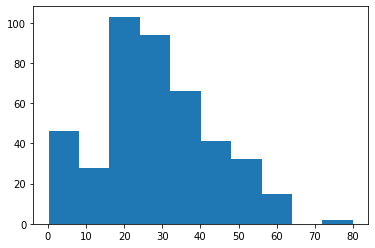

In [13]:
plt.hist(df[df["survived"] == 1]["age"])

Interesting... It looks like young children had high survival rates. Let's explore this more by increasing the number of bins.

(array([33., 13.,  8., 20., 40., 63., 43., 51., 43., 23., 14., 27., 17.,
        15.,  9.,  6.,  0.,  0.,  1.,  1.]),
 array([ 0.1667  ,  4.158365,  8.15003 , 12.141695, 16.13336 , 20.125025,
        24.11669 , 28.108355, 32.10002 , 36.091685, 40.08335 , 44.075015,
        48.06668 , 52.058345, 56.05001 , 60.041675, 64.03334 , 68.025005,
        72.01667 , 76.008335, 80.      ]),
 <a list of 20 Patch objects>)

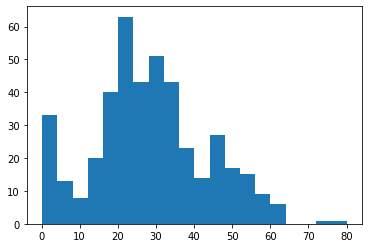

In [14]:
plt.hist(df[df["survived"] == 1]["age"], bins = 20)

<b>Conclusion:</b> We can see that many people under the age of 4 and between age 70-80 survived the disaster. This indicates that there is some correlation between age and whether someone survived the disaster. Therefore, we make sure to include this feature in our model training later.

Let's look at a more advanced syntax to simplify our visualization. here we will explore the survival by `pclass` by `age`. 

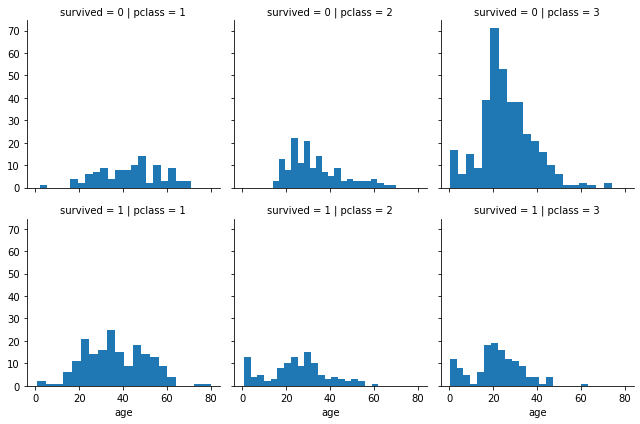

In [15]:
# Create a seaborn grid of empty plots with as many rows as unique values in "pclass" and columns as "survived" 
grid = sns.FacetGrid(df, row='survived', col="pclass")

# apply plt.hist on the 'age' column of each selected data in the grid. 
grid.map(plt.hist, 'age', bins = 20)

# So the first line splits the data by 'survived' and 'pclass' columns, and then grid.map applies a plt.hist(..., bins = 20) on the age column.

Let's do the same for survivors based on age and sex as well.

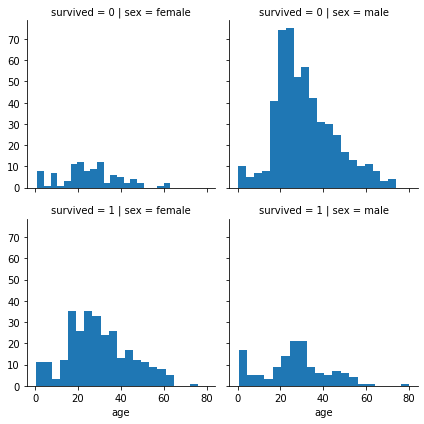

In [16]:
# Create a seabord grid of empty plots with as many rows as unique "pclass" and columns as "survived" values
grid = sns.FacetGrid(df, row='survived', col='sex')

# apply plt.hist on the 'age' column of each selected data in the grid. 
grid.map(plt.hist, 'age', bins = 20)

<b>Observation</b>

These plots provide more intuition on who survived and who didn't. It appears that:
- pclass 1 had the least passengers, but most survived
- pclass 3 had the most passengers, and most didn't survive
- most females survived while most men didn't
- most children and all elderly survived
- ...

<b>Conclusion: </b>

From this, we get the intuition that there might be a good correlation between age, sex, pclass, and whether someone survived or not. So these are features that we might consider for our model training.

##### Pin Plots
Next, let's learn how to use `plt.pointplot` and `plt.barplot` to explore correlations in categorical and numerical features.

First, we will explore if the port of boarding (`embark`) seems to correlate with the survival rate.

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


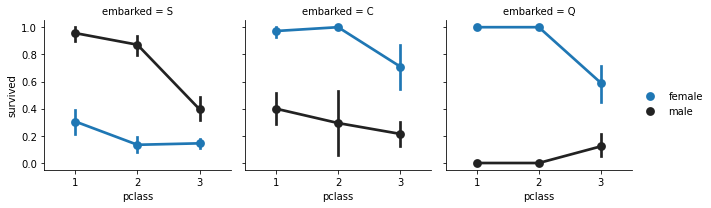

In [17]:
grid = sns.FacetGrid(df, col='embarked')
grid.map(sns.pointplot, 'pclass', 'survived', 'sex')
grid.add_legend()

<b>Conclusion: </b> It appears that port of entry has an impact on whether males or females survived, so we should definitely consider adding this to our model. 

##### Bar Plots

Next let's see if those who paid more, were more likely to survive. For this, we will use a `plt.barplot`

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


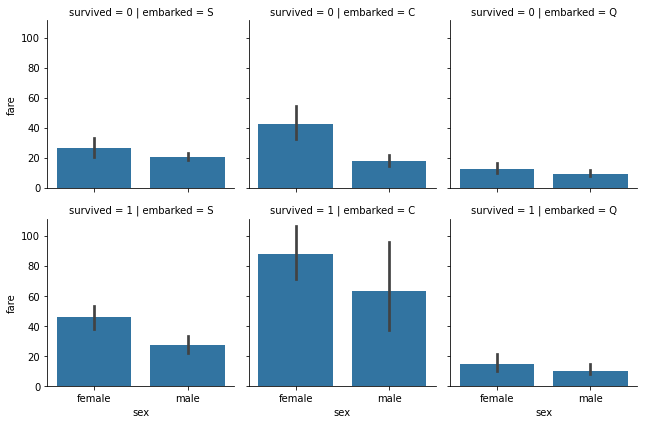

In [18]:
grid = sns.FacetGrid(df, row="survived", col='embarked')
grid.map(sns.barplot, 'sex', 'fare')
grid.add_legend()

<b>Conclusion: </b> It also appears that though not as significant as other features, the paid fare played a role in whether someone survived or not. And this seems to be impacted by the port of entry as well as their gender. So let's consider `fare` for our model training as well.

<b>Exercise:</b>

You are now well-equipped to explore your assumptions about this data. Let's see if you can find correlations that could indicate your assumptions are correct or not.

You could give plots such as [heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html), [box plots](https://seaborn.pydata.org/generated/seaborn.boxplot.html), and [Joint Distribution Plots](https://seaborn.pydata.org/generated/seaborn.jointplot.html) a try.

In [19]:
# Room for exercise




This brings us to the end of our data exploration; we are now ready to clean and wrangle our data and then proceed to model training.

### 5. Data Cleaning

Let's clean our data, remove what we don't need, and fill in the blanks.

#### Dropping unimportant features.

While we can't know if a feature is useful or not initially, we can get a good feeling about it based on our data exploration. It is always a good practice to start with fewer features and slowly add more since fewer features mean faster model training and iteration time.

In this case, based on our observations in the previous section, we are going to keep `pclass`, `age`, `sex`, `embarked`, and `fare`. Additionally, we would see correlations from the following if we explored them, so we will keep those as well: `name`, `sibsp`, `parch`
And of course, our target column: "survived."

In [20]:
df = df.loc[:, ["pclass", "age", "sex", "embarked", "fare", "name", "sibsp", "parch", "survived"]]
df.head()

,pclass,age,sex,embarked,fare,name,sibsp,parch,survived
0,1,29.0000,female,S,211.3375,"Allen, Miss. Elisabeth Walton",0,0,1
1,1,0.9167,male,S,151.5500,"Allison, Master. Hudson Trevor",1,2,1
2,1,2.0000,female,S,151.5500,"Allison, Miss. Helen Loraine",1,2,0
3,1,30.0000,male,S,151.5500,"Allison, Mr. Hudson Joshua Creighton",1,2,0
4,1,25.0000,female,S,151.5500,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,2,0


Since most Machine Learning models cannot deal with blank data, let's see which columns have empty values and address those. For this, we use the `.isnull()` function that puts a true/false on each cell indicating if it is blank, and then we use the `.sum()` function on the result to sum up how many trues (blanks) are in each column.

In [21]:
df.isnull().sum()

pclass        0
age         263
sex           0
embarked      2
fare          1
name          0
sibsp         0
parch         0
survived      0
dtype: int64

In [22]:
# Exercise
# You can try df.isnull() by itself to see what the output looks like


Let's start with `age` as it has the most blanks. We shall replace the blank ones with a guessed value. Based on your knowledge of the domain, you can choose different methods for guessing empty numbers; here, we can fill in the age median and move on. 

Of course, this is a very simplistic method and introduces unwanted error. A better approach would be to guess the age based on the median of age in each group separated based on `sex`, `pclass`, `embarked`. But that is out of the scope of this introductory notebook.

`.fillna()` is used to fill in the NaN values.

In [23]:
# Let's get the Mode of age
age_mode = df['age'].mode()
age_mode

0    24.0
dtype: float64

In [24]:
# Since age_mode is a Series, we get the first and only element, so we have a scalar number to use
age_mode = age_mode[0]

# Then we can use the fillna()
df["age"] = df["age"].fillna(age_mode)

In [25]:
# Let's verify we have no more NaN's in the age column
df["age"].isnull().sum()

0

<font color='red'><b>Exercise:</b></font> Do the same for the embarked column.

In [26]:
# Exercise 
# Fill NaN embarked values with the mode of that column


Our Data is now relatively clean, so we can move on to the next step.

### 6. Data Wrangling

Many Machine Learning algorithms operate on numerical values only, so we need to convert our textual and categorial fields to numbers

In [27]:
# Let's see the types first
df.dtypes

pclass        int64
age         float64
sex          object
embarked     object
fare        float64
name         object
sibsp         int64
parch         int64
survived      int64
dtype: object

One way to do this is to replace each value with a number that you want. You would use the following syntax for that.

```python
df['sex'] = df['sex'].map( {'female': 1, 'male': 0} )
df['sex'] = df['sex'].astype(int)
```

However, since we don't care about which number represents which column, there is a simpler way using `.astype('category')` and `cat.codes`

In [28]:
# Convert the column type to categorical
df["sex"] = df["sex"].astype('category')
df.dtypes

pclass         int64
age          float64
sex         category
embarked      object
fare         float64
name          object
sibsp          int64
parch          int64
survived       int64
dtype: object

In [29]:
# Replace the categorical column with numberical codes
df["sex"] = df["sex"].cat.codes
df.dtypes

pclass        int64
age         float64
sex            int8
embarked     object
fare        float64
name         object
sibsp         int64
parch         int64
survived      int64
dtype: object

In [30]:
# Exercise 
# print the values inside the "sex" column to see if they are what you expected


Next, Let's do the same for the other categorical columns too.

In [31]:
df["pclass"] = df["pclass"].astype('category').cat.codes
df["embarked"] = df["embarked"].astype('category').cat.codes
df["survived"] = df["survived"].astype('category').cat.codes

# Let's check the head to see if it looks ok
df.dtypes

pclass         int8
age         float64
sex            int8
embarked       int8
fare        float64
name         object
sibsp         int64
parch         int64
survived       int8
dtype: object

Next, let's take care of the `name` column.

Perhaps the titles of the passengers would have some corrolation with their survival. Let's see.

In [32]:
# Extract Titles from name

# Here's what we are doing
# Left handside: create a new column called titles
# Right handside: 
#   .str: treat the names as string
#   .extract: extract the part of string that matches our regular rexpression ' ([A-Za-z]+)\.'
# See the next cell for what a regular expression is.
df['title'] = df["name"].str.extract(' ([A-Za-z]+)\.')
df['title']

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
         ...  
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: title, Length: 1309, dtype: object

<b>Regular Expressions</b>: Also called regex, regular expressions are a syntax that describes textual patterns. You can read this tutorial on [python regex](https://docs.python.org/3/howto/regex.html) to learn more.

Specifically, here our regex ` ([A-Za-z]+)\.` means to find any word pattern that starts with one space(` `), ends with one dot (`\.`), and has one or more `+` upper or lower case letters `[Az-az]`. 

[Click Here](https://regexr.com/5n4td) to see a visual description of what this regex does or create your own.

Now that we have our titles let's group the rare ones since the specific title probably won't have much value, but whether it's a generic or rare one might.

`.count_values()` counts unique values in a column and shows you how many times each repeats.

In [33]:
# Let's see the unique titles:

df["title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Jonkheer      1
Sir           1
Don           1
Lady          1
Mme           1
Capt          1
Countess      1
Dona          1
Name: title, dtype: int64

`.replace(x,y)` replaces all occurrences of `x` with `y` within the given column.

In [34]:
# Let's fix the typos
df["title"] = df["title"].replace('Mlle', "Miss")
df["title"] = df["title"].replace('Ms', "Miss")
df["title"] = df["title"].replace('Mme', "Miss")
df["title"] = df["title"].replace('', "None")
# Let's replace the rare ones with keyword 'rare'
# Here we are selecting the rare titles as anything not in a list
df["title"][~df["title"].isin(["Mr", "Miss", "Mrs", "Master"])] = "Rare"

df["title"].value_counts()


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Mr        757
Miss      265
Mrs       197
Master     61
Rare       29
Name: title, dtype: int64

Now let's see if our hypothesis seems reasonable that rare titles have a different chance of survival. To do this, we will make a bar plot using `sns.barplot` and see if there is a notable difference between the averages.

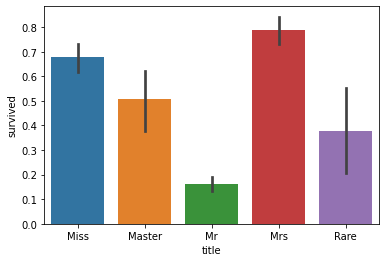

In [35]:
sns.barplot(x='title', y='survived', data=df)

There seems to be a correlation between the title and survival rate. Even within the same gender (for instance, male), the title seems to make a difference in the survival rate.

<b>Conclusion:</b> So let's keep the new `title` column and drop the `name`. There seems to be value to be gained from the title column.

`.drop()` is used for this, and we use `axis=1` to indicate it is a column that we are dropping, not a row. 

In [36]:
df = df.drop("name", axis=1)
df.head()

,pclass,age,sex,embarked,fare,sibsp,parch,survived,title
0,0,29.0000,0,2,211.3375,0,0,1,Miss
1,0,0.9167,1,2,151.5500,1,2,1,Master
2,0,2.0000,0,2,151.5500,1,2,0,Miss
3,0,30.0000,1,2,151.5500,1,2,0,Mr
4,0,25.0000,0,2,151.5500,1,2,0,Mrs


Finally, let's replace the Title column with numerical values and we are ready to train own Machine Learning Model.

In [37]:
# we will do this in steps so it's easier to follow
titles = df["title"].astype('category').cat.codes
titles_as_category = titles.astype('category')
title_codes = titles_as_category.cat.codes

# Assign the title codes 
df["title"] = title_codes

# Print the top of the table to check
df.head()

,pclass,age,sex,embarked,fare,sibsp,parch,survived,title
0,0,29.0000,0,2,211.3375,0,0,1,1
1,0,0.9167,1,2,151.5500,1,2,1,0
2,0,2.0000,0,2,151.5500,1,2,0,1
3,0,30.0000,1,2,151.5500,1,2,0,2
4,0,25.0000,0,2,151.5500,1,2,0,3


## Data Analysis

Now that we have collected, cleaned, and wrangled our data, it is time to build our predictive model. Note that there are different families (classes) of predictive models (supervised, unsupervised, neural networks, ...), and each family has many models to select from. The choice of algorithm is one that you make in a real-life scenario, experiment and see the results of your technique chosen, and then decide how to proceed:

- Explore another family/model.
- Keep the one you have trained.
- Create a hybrid (bagging, boosting, ensemble, etc) to capitalize on multiple models' strength.

In a real-life scenario, you would want to do some research on each model class, learn their strengths, weaknesses, input/output format, and then pick the most promising ones based on your knowledge of the problem that you are solving.

To keep this notebook within our timelimit, we will explore only one <b>"classifier"</b> model from the <b>"supervised learning"</b> class, called <b>"Decision Tree"</b>.

### What is a Decision Tree

From scikit-learn's documentation:

> Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

Simply put, this model is a tree-like set of decisions that finally lead to a prediction. 

As for its strengths, here are some of the ones that relate to our problem today from scikit-learn's documentation:

>
    Some advantages of decision trees are:
        - Simple to understand and to interpret. Trees can be visualised.
        - Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
        - Able to handle both numerical and categorical data. However scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialised in analysing datasets that have only one type of variable.
        - Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
        - Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

And as for relevant weaknesses:
>
    The disadvantages of decision trees include:
        - Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
        - Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
        - Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations. Therefore, they are not good at extrapolation.
        - There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
        - Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

With these pros and cons in mind, Decisions Trees seem like a strong candidate for our problem, so let's use them and see how they perform.

[Learn more](https://scikit-learn.org/stable/modules/tree.html)

### Packages used: scikit-learn

We will learn and use scikit learn, which implements user-friendly methods to perform the training and testing of an algorithm for us. There are other libraries out there that could do the same. However, they often require more in-depth knowledge of how the algorithms work internally to configure correctly.

A few concepts that we should learn before moving further:


#### training/validation and test split

We often split our dataset into three sections (train/validate/test), often with ratios (50/25/25). This is, however, not always the case, and in simplified scenarios, such as our use-case, one might only use a (train/validate) split with a ratio of (70/30). We discuss the use of the "test" below.

- The training set is shown to the model, so it learns the patterns to use for its predictions
- The validation set is then used to assess the true performance of the model. This technique helps find out if the model just memorized the input data or if it can in-fact predict unseen data correctly (aka. [generalize](https://en.wikipedia.org/wiki/Generalization_error)).
- The test set is used when the validation error is used for selecting the best model or when performing [hyper-parameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization)). In those cases, because we are using the error rate from the validation set to pick the best model, our validation error rate will be lower than the model's true error rate. Therefore, we need a set of data that we never used to optimize or pick our model to assess an unbiased error rate.

[Learn More](https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets)

Since, in this case, we are just using one model (no model selection), and once trained, we aren't tuning it any further (no Hyperparameter_optimization), we can skip the test set and use a 70/30 train/validate split.

#### Model fit

It is crucial to know how a model's prediction fits the actual predictions. If the model is not adequately trained, the training phase's predictions can't closely match the true predictions. This is called underfitting. In an underfit case, the model will also perform poorly on the evaluation set.

On the other hand, if a model performs amazingly on the training set (think 99% accurate) but poorly on the validation set, it is most likely overfit. You can think of this as a model that has almost memorized the training set and therefore is incapable of performing well in predicting new inputs. 

If a model is neither underfitting nor overfit, it is called balanced. This is the place we want to be in, and this is why we keep unseen data (validation and test splits). We use those unseen data to detect if our model is overfitting the data.

[Learn More](https://en.wikipedia.org/wiki/Overfitting)

#### Uppercase `X` and lowercase `y`

A tradition among data scientists is to use uppercase `X` to denote the input data to a model and the lowercase `y` the target predictions or values that the model is expected to learn and predict. That is, each set (train/validate/test) is split into `X` and `y`, where `y` is the predicted column, and `X` is all the other columns.

With the definitions our of the way, let's split our data, perform our training, and see how they perform on unseen data (validation).

### 7. Splitting Data for Training

We begin by splitting our full dataset into `X` and `y` and then splitting it to train/validation subsets (also called splits).

In [8]:
# import the libraries we need
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split target column our
X = df.drop("survived", axis = 1)
y = df["survived"]

# perform the train/validation split
# test is our validation here since we won't further split out train set
# We specify the random state here for reprocucable results. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

# Let's check the shapes (table dimentions) to make sure it makes sense
X_train.shape, y_train.shape, X_test.shape

((877, 13), (877,), (432, 13))

In [39]:
# Exercise:
# Take a look at the data splits [X_train, X_test, y_train, y_test] and see if they make sense to you. You can explore, length, columns, dtypes, ...



### 8. Model Training

With `X_train`, `y_train`, `X_valid`, and `y_valid` ready, we move on to training our model.

<font colot='red'><b>Note:</b></font> 
The following line won't work, once you see the error, read the <b>very last line</b> and try to debug the issue in the next cell, then move forward to see the solution.

In [9]:
# Decision Tree
decision_tree = DecisionTreeClassifier()

# Note: This won't work, once you see the error, read it try to debug the issue, then move forward to see the solution.
decision_tree.fit(X_train, y_train)


ValueError: could not convert string to float: 'Goodwin, Master. Harold Victor'

Looks like something is wrong. Take a look at the last line of the ValueError message and use the cell below to explore and see if you can findout what is wrong. We left a small mistake intentionally to experience the debugging process.

In [41]:
# Exrcise 
# Explore the copy of our original table below and find out what is wrong
# Make sure not to modify to original df, and only work on the df2
df2 = df.copy()

# You may explore df2 here



# Hint: There is a missing value. Can you find it? (A quick online search might help.)

<b>Solution:</b>

As the error says:
> Input contains NaN, infinity or a value too large for dtype('float32')

So let's find the column with NaN and fill it with an average for that column.

We will use the `.isnull()` to fill the table with true wherever there is a null, and then use the `.any()` to show if in each column there is any True (which would mean a `NaN`). You can run these steps one-by-one 

In [42]:

df.isnull().any()

pclass      False
age         False
sex         False
embarked    False
fare         True
sibsp       False
parch       False
survived    False
title       False
dtype: bool

Now let's count the `NaN` in fare column. 

Note that `df["fare"].isnull().count()` wouldn't work as it would count all values: `true` and `false`! Instead, use `.sum()` that treats `true` as 1 and `false` as 0, hence counting the `true`s by summing.

In [43]:
df["fare"].isnull().sum()

1

ok there is only one missing value, so let's replace it with the mean and move on.abs


In [44]:
fare_mode = df["fare"].mode()[0]
df["fare"] = df["fare"].fillna(fare_mode)

# and let's make sure there are no more nulls
df.isnull().any()

pclass      False
age         False
sex         False
embarked    False
fare        False
sibsp       False
parch       False
survived    False
title       False
dtype: bool

Perfect, no more nulls, we can now train our model

In [50]:
# Redo our split with fixed data
X = df.drop("survived", axis = 1)
y = df["survived"]

# Note a method can have more than one output, here, it has 4!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Decision Tree
decision_tree = DecisionTreeClassifier()

# Train Model
decision_tree.fit(X_train, y_train)

# Make predictions for validation set
y_pred = decision_tree.predict(X_test)

# calculate models accuracy on training set
train_score = decision_tree.score(X_train, y_train)
test_score = decision_tree.score(X_test, y_test)

# Print results
# We know this is a new syntax to format and round numbers to two decimal places within a string. 
# You can learn more at https://www.w3schools.com/python/ref_string_format.asp
print("Trainins Score: {:.2f} validation score: {:.2f}".format(train_score, test_score))

Trainins Score: 0.97 validation score: 0.74


It looks like our decision tree is overfitting! It does very well with the training data 97% accuracy and performs poorly on unseen data (validation set). 

How to counter that is beyond this notebook's scope, but you can begin by forcing each branch of the tree to have at least 10 leaves. That is replacing the following line
```python
decision_tree = DecisionTreeClassifier()
```
with:
```python
decision_tree = DecisionTreeClassifier(min_samples_leaf=10)
```

This should reduce overfitting and improve our accuracy to about 80%! 

In [51]:
# Tuning the Tree Parameters
decision_tree = DecisionTreeClassifier(min_samples_leaf=10)

# Train Model
decision_tree.fit(X_train, y_train)

# Make predictions for validation set
y_pred = decision_tree.predict(X_test)

# calculate models accuracy on training set
train_score = decision_tree.score(X_train, y_train)
test_score = decision_tree.score(X_test, y_test)

# Print results
print("Trainins Score: {:.2f} validation score: {:.2f}".format(train_score, test_score))

Trainins Score: 0.85 validation score: 0.80


## Conclusion

This brings us to the end of this notebook. You now have created your first Machine Learning model with high accuracy and can apply your knowledge to your specific domain.

You can always come back to this notebook and try different experiments by adding or editing cells.

Thanks for joining us, and let us know if you have any comments.

## Final Challenge

It is possible to improve the model even further. By following the steps below, you can create an even better performing model while practicing the skills you learned earlier.

<b>Intuition:</b> 

We consider the following hypothesis: those who were alone were less likely to survive. 

<b>Thought Process:</b> 

Based on our dataset's columns, we could deduce if someone was alone or not based on whether parents accompanied them or whether they had any siblings accompanying them. To create a new feature (column) that indicates this and use that in our model training. We can then compare the performance of our model to the model that we built earlier.

<b>Approach:</b>

1. Acquire the data
1. Create a new feature (column) called `IsNotAlone`
1. Fill in the new column with a boolean `True` or `False` indicating if they were not alone
1. Split the new dataset into `X` and `y`
1. Split both `X` and `y` into training and validation sets
1. Train a new Decision Tree model based on this new dataset
1. Evaluate the model's performance

<b>Hint:</b>

Once you have an idea on what to do, an online search of `how to do ... in pandas` or `how to do ... with scikit decision trees` might be all you need to find the missing link. And, of course, all the steps are also outlined above.

In [13]:
# 1. Acquire the data

# Since we kept the sibsp or parch columns already, a copy of df in its current state works for us
# use `df.copy()` to make a copy of it

df2 = df.copy()

In [15]:
# 2 & 3. Set df2['IsNotAlone'] equal to a logical OR of sibsp or parch being greater than zero
# Fill in the blanks

df2['IsNotAlone'] = ( ) or ( )

0       False
1        True
2        True
3        True
4        True
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

In [ ]:
# 4. Split the survived column of df2 to y and keep the rest in X
# fill in the blanks

X = df2.drop( , axis = 1)
y = df2[ ]

In [ ]:
# 5. Use the train_test_split method to split your data
# fill in the blanks


X_train, X_test, y_valid, y_valid = train_test_split( ,  , test_size= )

In [ ]:
# 6. Create a new DecisionTreeClassifier
challenge_decision_tree = DecisionTreeClassifier(min_samples_leaf=10)

# Train Model

# Make predictions for validation set


In [ ]:
# 7. Using .score(X_train, y_train) and .score(X_valid, y_valid) calculate your training and validation score


# calculate models accuracy on training set

# Print results (Done for you)
print("Trainins Score: {:.2f} validation score: {:.2f}".format(train_score, test_score))
